# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [3]:
# Write your code here
df.shape


(1898, 9)

#### Observations:
There are 1898 rows and 9 columns in the Foodhub dataset.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [4]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
Observations:

Since there are many object data types and they are occupying more data space in the data frame let us convert 
restaurant_name,cuisine_type and day_of_the week to categorical variables. The rating column is object type as its values are considered as strings.
All the other variables are numerical and there for their python data types (float64 and int64) are fine.

### **Question 3:**  'restaurant_name', 'cuisine_type', 'day_of_the_week' are object type attributes. Convert them to 'category' type. Does this result in reduced memory usage? (Check the info() function) [1 mark]

In [5]:
# Converting "objects" to "category" reduces the data space required to store the dataframe
# write the code to convert 'restaurant_name', 'cuisine_type', 'day_of_the_week' into categorical data

# Passed a dictionary to astype() function 
df = df.astype({"restaurant_name":'category',"cuisine_type":'category', "day_of_the_week":'category'})

# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1898 non-null   object  
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(3), float64(1), int64(4), object(1)
memory usage: 102.7+ KB


#### Observations:

We can see that the Dtype for restaurant_name,cuisine_type,day_of_the_week are changed to category datatype.
The memory usage is 102.7 which is like 31 KB less than when these were Object data type.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [6]:
# Write your code here
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:
The mean and median of Food_preparation_time is same.
The mean and median of Delivery_time is almost same like 24 and 25 minutes which is only 1 minute difference.
The mean for food_preparation_time and delivery_time does not have much change that is why std for both of them is almost 
same that tells us that the spread in the two data sets is same.

### **Question 5:** How many orders are not rated? [1 mark]

In [7]:
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

In [8]:
notrated = (df['rating'] == 'Not given').sum()
print("Orders not rated: ", notrated)

Orders not rated:  736


#### Observations:
With the value above out of 1898 orders 736 orders were not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

Univariate Analysis on Numerical Columns

In [9]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

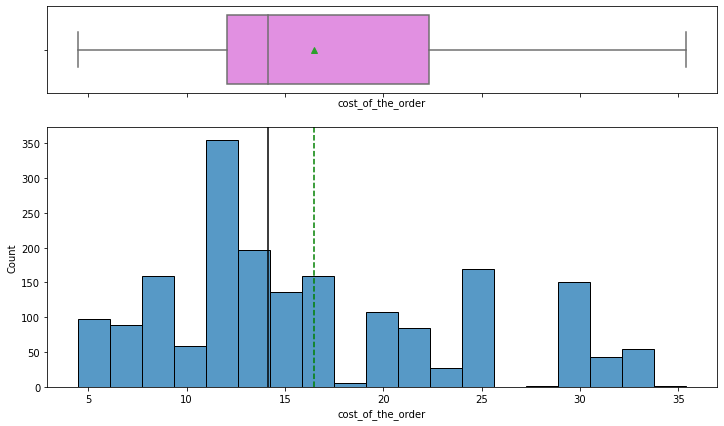

In [10]:
histogram_boxplot(df, 'cost_of_the_order')

## Observations: the above plot shows that 
1. Cost_of_the_order between 11 and 12 is nearly 350 orders
2. The meadian value for cost_of_the_order is 14 and the mean is 16 some thing.
3. This shows that mean and median are near values.

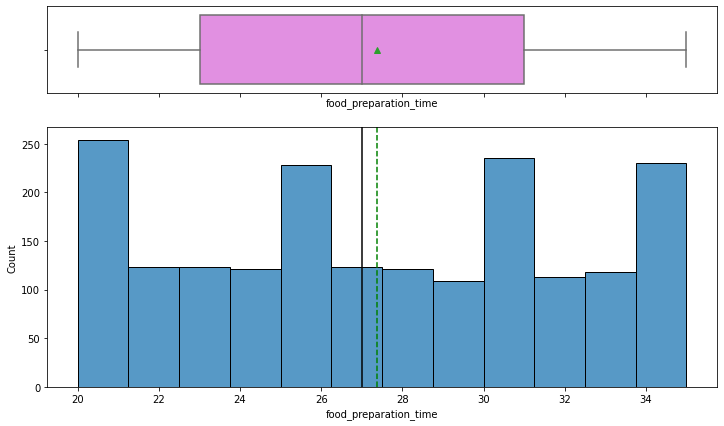

In [11]:
histogram_boxplot(df, 'food_preparation_time')

## Observations: 
The food_preparation_time for 20 has more values nearly 250 where as other values are little lesser than that.
This plot shows the mean and median preparation time for the meals is almost same.

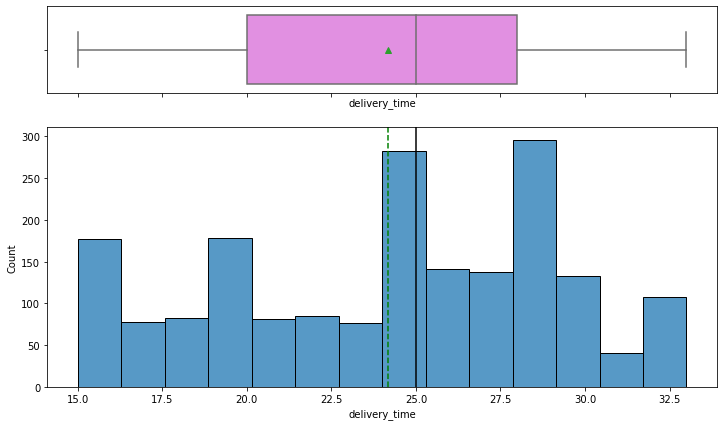

In [12]:
histogram_boxplot(df, 'delivery_time')

## Observations:
The delivery_time also has the mean and median almost the same.
The time for 24 and 28 has more values that shows that the most of food delivery was in between 24 and 28 minutes.

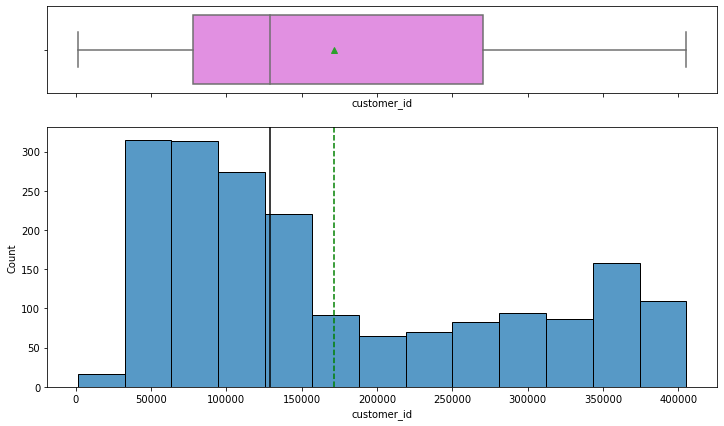

In [13]:
histogram_boxplot(df, 'customer_id')

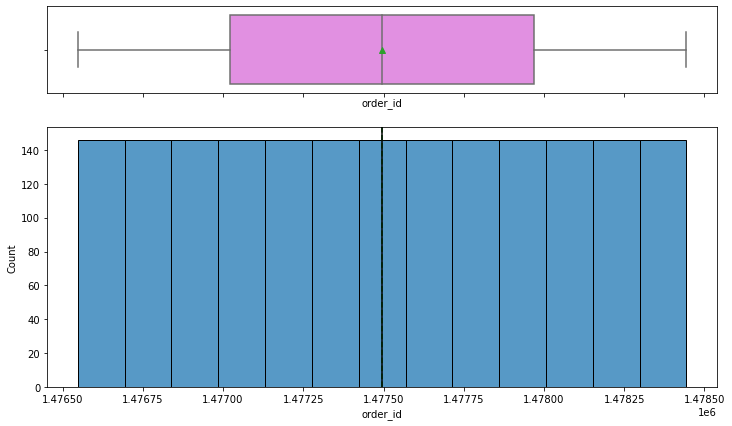

In [14]:
histogram_boxplot(df, 'order_id')

Univariate Analysis on Categorical Columns
---------------------------------------------------------------

In [15]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<Figure size 720x504 with 0 Axes>

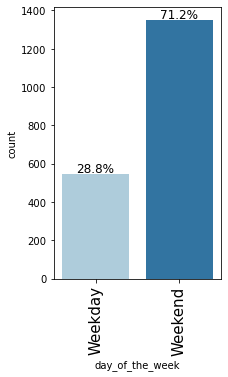

In [16]:
plt.figure(figsize=(10,7))
labeled_barplot(df, 'day_of_the_week', perc=True)

Observations:
The above plot shows that there are 71.2% of orders during the weekend which is very high compared to during the weekday.

<Figure size 1080x504 with 0 Axes>

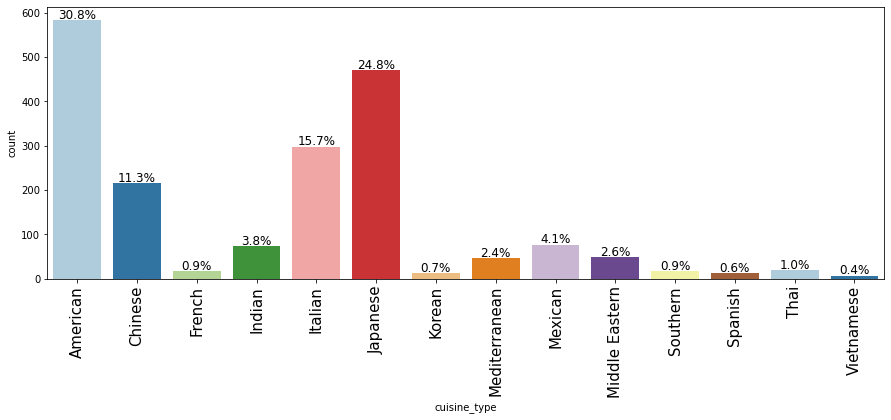

In [17]:
plt.figure(figsize=(15,7))
labeled_barplot(df, 'cuisine_type', perc=True)

<Figure size 1080x504 with 0 Axes>

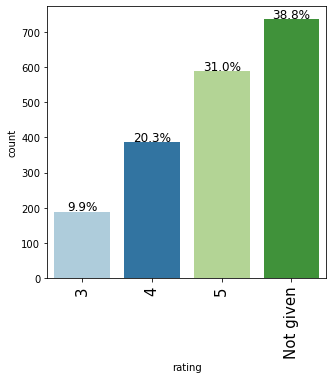

In [18]:
plt.figure(figsize=(15,7))
labeled_barplot(df, 'rating', perc=True)

The above plot shows that American Cuisine type has more orders compared to the other cuisine type and vietnamese cuisine type has the least percentage of orders.

The restaurant_name has unique values of 178 which can't be plotted on count plot so I am doing with Value_counts and taking the first 20 counts of Restaurants.

<AxesSubplot:>

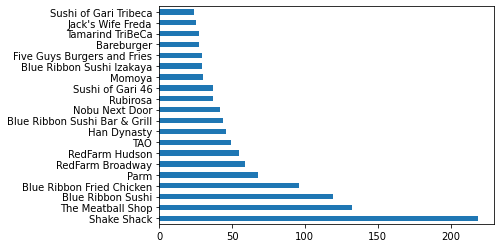

In [19]:
df['restaurant_name'].value_counts()[:20].plot(kind='barh')

The above plot shows that Shake Shack restaurant has more than 200 orders.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [20]:
# Write the code here
df['restaurant_name'].value_counts().head(5)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:
The above result shows that the Restaurant named Shake Shack received most number of orders and the above restaurants 
were the first 5 restaurants which received most number of orders.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [21]:
df[df.day_of_the_week == 'Weekend'].cuisine_type.value_counts().head(1)

American    415
Name: cuisine_type, dtype: int64

#### Observations:
The above result shows that the American Cuisine type is the most popular during the weekend.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [22]:
# Write the code here
df[df.cost_of_the_order > 20.00].value_counts()

order_id  customer_id  restaurant_name                        cuisine_type    cost_of_the_order  day_of_the_week  rating     food_preparation_time  delivery_time
1476560   149508       Shake Shack                            American        22.26              Weekend          4          32                     17               1
1477852   74412        da Umberto                             Italian         32.98              Weekend          Not given  30                     28               1
1477846   52574        Blue Ribbon Sushi                      Japanese        24.25              Weekday          5          30                     26               1
1477847   106478       Blue Ribbon Sushi                      Japanese        24.25              Weekday          4          22                     29               1
1477848   276192       12 Chairs                              Middle Eastern  29.05              Weekday          5          28                     32               1
   

In [23]:
orders20 = (df['cost_of_the_order'] > 20).value_counts(normalize=True)
orders20

False    0.707587
True     0.292413
Name: cost_of_the_order, dtype: float64

#### Observations:
The above result shows that only 29% of the orders received cost more than 20 dollars 
and nearly 71% cost less than 20 dollars.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [24]:
# Write the code here
df['delivery_time'].mean()

24.161749209694417

#### Observations:
The mean delivery time for an order is 24 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [25]:
df['customer_id'].value_counts().head(5)

52832     13
47440     10
83287      9
250494     8
259341     7
Name: customer_id, dtype: int64

#### Observations:
The above 5 customers are the frequent customers who order the food through food hub get the 20% discount voucher.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


<Figure size 1800x720 with 0 Axes>

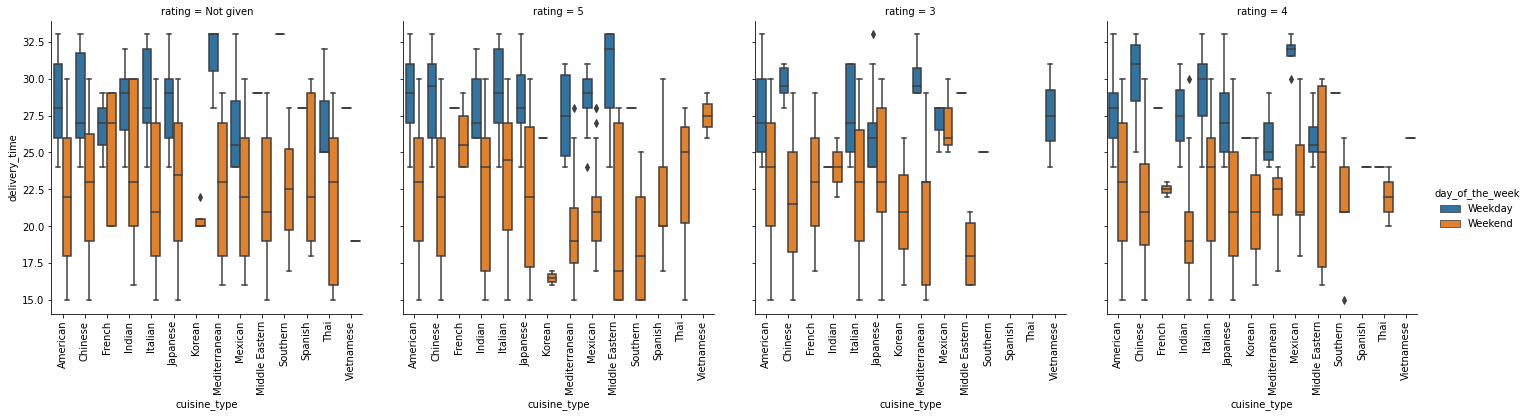

In [26]:
plt.figure(figsize=(25,10))
cdw = sns.catplot(x="cuisine_type",
                    y="delivery_time",
                    hue="day_of_the_week",
                    col ='rating',
                    data=df, 
                    kind="box");
cdw.set_xticklabels(rotation=90)
plt.show()

##Observations:
1. There are no orders for the Korean and Spanish Cuisine_type during the weekdays.
2. Vietnamese is taking the minimum delivery_time greater than 23 minutes.
3. French cuisine type is having less orders during the weekends and taking more delivery time during the weekend.
4. There are very less cuisine types for the rating 3.

<Figure size 1800x720 with 0 Axes>

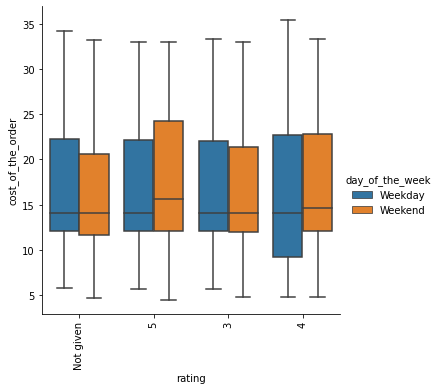

In [27]:
plt.figure(figsize=(25,10))
cdw1= sns.catplot(x="rating",
                    y="cost_of_the_order",
                    hue="day_of_the_week",
                    data=df, 
                    kind="box");
cdw1.set_xticklabels(rotation=90)
plt.show()

## Observations:
1. Rating 5 is given more to the orders on the weekend.
2. Rating 3 given less on both the weekdays and weekends.
3. Cost_of_the_order is nearly 25 dollars on weekends for which the rating was given 5.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [28]:
# Write the code here
top50 = df[df.rating > '4'].restaurant_name.value_counts().head(5)
top50

Shake Shack                  146
The Meatball Shop            101
Blue Ribbon Sushi             78
Blue Ribbon Fried Chicken     64
Parm                          43
Name: restaurant_name, dtype: int64

##Observations:
In the above list the first four resaurants are eligible for the promotional offer which fulfills the criteria.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [29]:
t = df.loc[df['cost_of_the_order'] > 20, 'cost_of_the_order'].sum()
print(t)

14754.91


In [30]:
t1 = df.loc[df['cost_of_the_order'] > 5, 'cost_of_the_order'].sum() and df.loc[df['cost_of_the_order'] < 20, 'cost_of_the_order'].sum()
print(t1)

16559.91


In [31]:
total_revenue = 0.25*t+0.15*t1
print("total_revenue:", total_revenue)
    

total_revenue: 6172.714


Observations: The total revenue generated for all the orders is equal to 6172 dollars.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [32]:
total_time = ['food_preparation_time','delivery_time']
df['time_required'] = df[total_time].sum(axis=1)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,time_required
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,49


In [33]:
ordergreater60 = (df['time_required'] > 60).value_counts(normalize=True)
ordergreater60

False    0.894626
True     0.105374
Name: time_required, dtype: float64

In [34]:

percentage = (ordergreater60.shape[0] / df.shape[0]) * 100

print("Percentage of orders which took delivery time greater than 60 :", round(percentage, 2), '%')

Percentage of orders which took delivery time greater than 60 : 0.11 %


#### Observations:
The above result shows there are 11 percentage of orders which took delivery time more than 60 minutes.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [35]:
# Write the code here
df.groupby(['day_of_the_week'])['delivery_time'].mean()

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

#### Observations:
The mean delivery time during the weekday is 28 minutes and during the weekend is 22 minutes which shows that during the weekend it takes less time compared to during the weekday.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]


Conclusions:

    Analyzed a dataset of nearly 2000 food orders. The data is categorized into two groups 
    as weekend and weekdays food deliveries.
    The main feature of interest here is food preparation time and the delivery time.
    
Further Analysis:

    American Cuisine type seems to be having more food orders.
    Japanese, Italian Cuisine type seems to be the next popular.
    The data shows that there are more percentage of orders with less than 20 dollars.
    Based on my observation French Cuisine type is taking more delivery time compared to other cuisines.
   
    
Recommendations to business:

There is so much demand of food order during the weekends, so if deliverytime and food preparation time
is reduced further there might be a potential for more orders.
I noticed that there is a high percentage of "Not given" Rating. If we can make customers to provide the ratings for 
every order, this might help to improve marketing and popularity of the business.


